In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

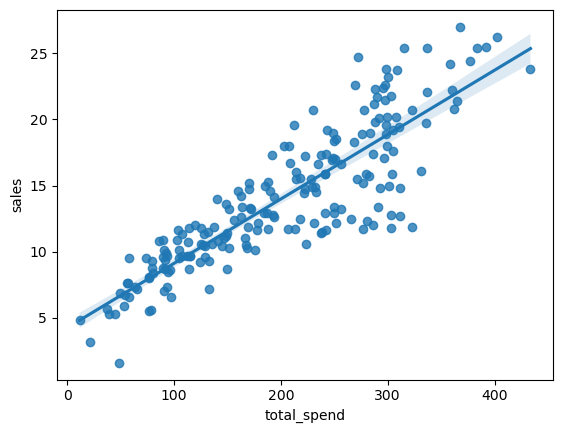

In [7]:
sns.regplot(data=df, x='total_spend', y='sales')

In [8]:
X = df['total_spend']
y = df['sales']

In [10]:
# help(np.polyfit)

In [13]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [15]:
# y = B1x + B0
#B1 = 0.04868788 and B0 = 4.24302822

# Теперь мы имеем 2 коэффициента, зная которые мы можем для
# любого `x` предсказать y.

In [18]:
potential_spend = np.linspace(0, 500, 100)
# 500 - потому что это диапазон нашего df.

In [20]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

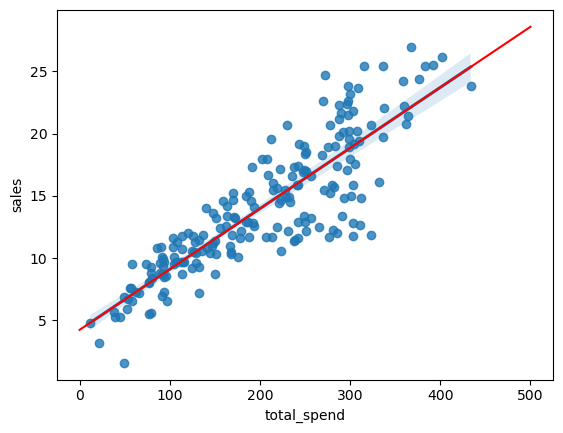

In [25]:
sns.regplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red');

In [26]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [27]:
predicted_sales

13.98060422

In [28]:
np.polyfit(X, y, deg=3)

# y = B3x**3 + B2x**2 + B1x + B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [29]:
pot_spend = np.linspace(0, 500, 100)

In [30]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

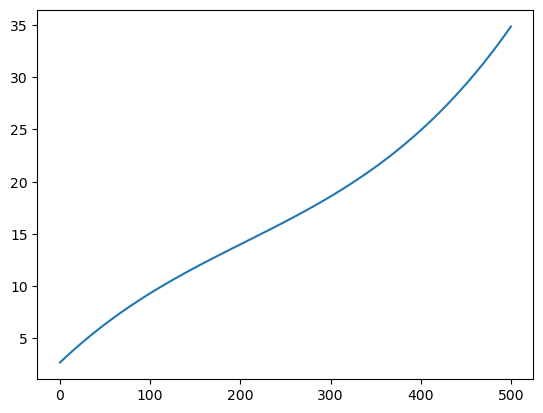

In [32]:
plt.plot(pot_spend, pred_sales)

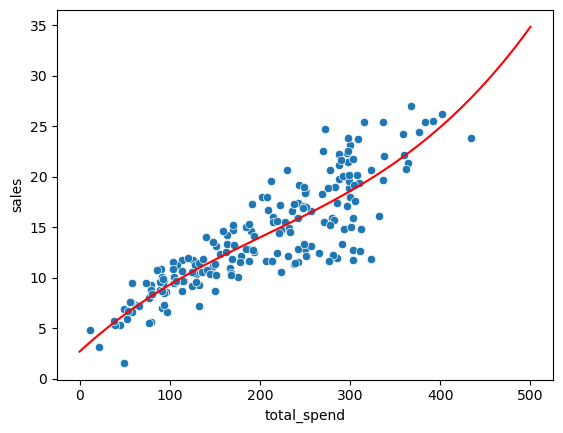

In [33]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pred_sales, color='red');

## Using Sckit-Learn

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
X = df.drop('sales', axis=1)

In [4]:
y = df['sales']

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
len(df)

200

In [8]:
len(y_test)

60

In [9]:
from sklearn.linear_model import LinearRegression

In [43]:
# help(LinearRegression)

In [10]:
model = LinearRegression() # Применяя модель первый раз - исп. дефолтные значения. Проверка baseline performance

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [14]:
# X_test.head()

In [16]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

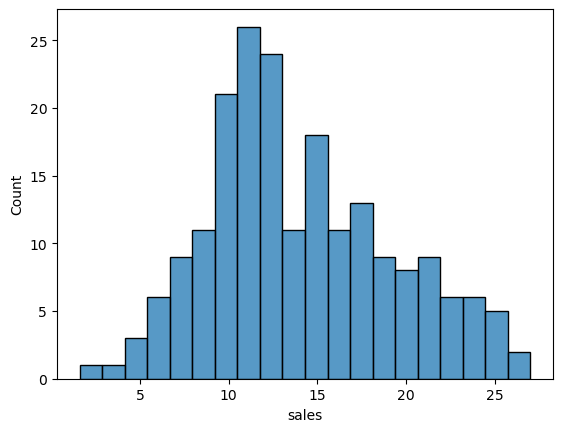

In [15]:
sns.histplot(data=df, x='sales', bins=20)

In [16]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144805

In [17]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882

In [24]:
test_residuals = y_test - test_predictions

In [25]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

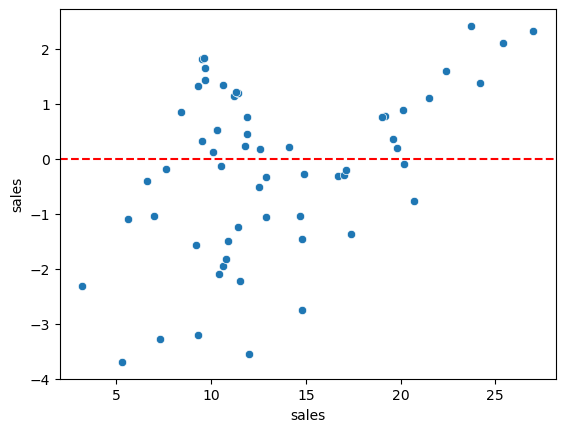

In [27]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, color='r', ls='--')

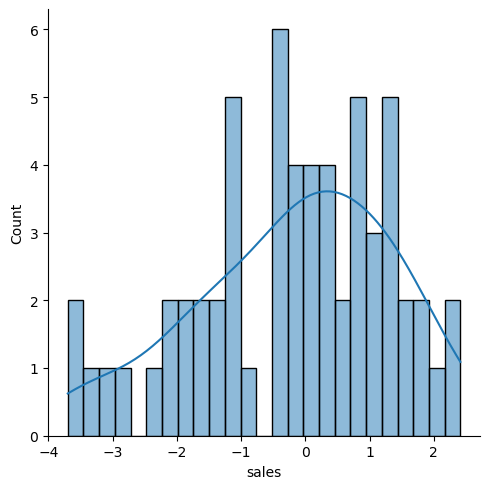

In [28]:
sns.displot(test_residuals, bins=25, kde=True)

In [29]:
import scipy as sp

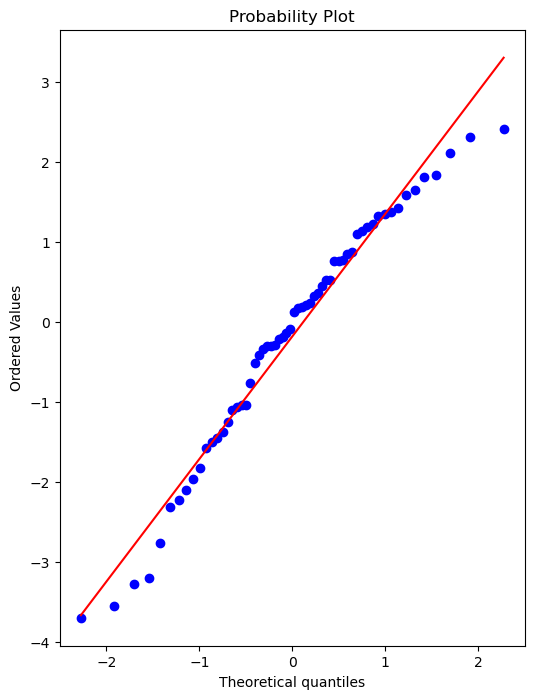

In [30]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [18]:
final_model = LinearRegression()

In [19]:
final_model.fit(X,y)

LinearRegression()

In [20]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [21]:
y_hat = final_model.predict(X)

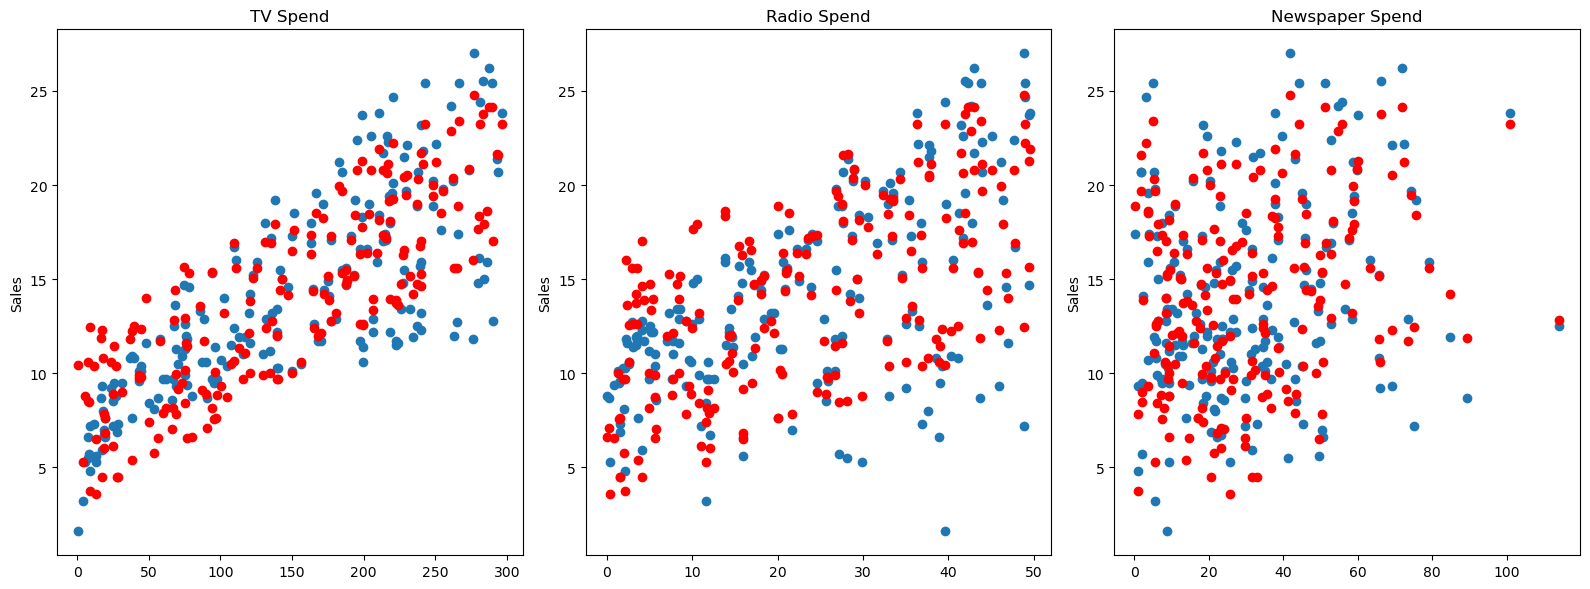

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red') # predicted points
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red') # predicted points
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red') # predicted points
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

In [27]:
from joblib import dump, load

In [28]:
dump(final_model, 'final_sales_mod.joblib')

['final_sales_mod.joblib']

In [29]:
loaded_model = load('final_sales_mod.joblib')

In [30]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
X.shape

(200, 3)

In [32]:
# Create example compaign
# 149 TV, 22 Radio, 12 Newspaper
# Sales?

compaign = [[149, 22, 12]]

In [33]:
loaded_model.predict(compaign)

C:\Users\ztvsp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

### Polynomial Regression

In [5]:
df = pd.read_csv("Advertising.csv")

In [6]:
X = df.drop('sales', axis=1)

In [7]:
y = df['sales']

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [45]:
# Первые три - совпадение.
230.1*37.8

8697.779999999999

In [46]:
230.1*69.2

15922.92

In [48]:
37.8*69.2

2615.7599999999998

In [49]:
230.1**2

52946.009999999995

In [50]:
# Can use in one line bc часто исп. операция: 
# polynomial_converter.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predictions = model.predict(X_test)

In [19]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)

In [21]:
MAE

0.4896798044803559

In [22]:
MSE = mean_squared_error(y_test, test_predictions)

In [23]:
MSE

0.4417505510403391

In [24]:
RMSE = np.sqrt(MSE)

In [25]:
RMSE

0.6646431757269001

In [26]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [27]:
df.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

In [28]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Polynomial Regression

In [32]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [36]:
train_rmse_errors

[1.7345941243293757,
 0.5879574085292231,
 0.43393443569020707,
 0.35170836883993417,
 0.2509342962728199,
 0.19945561338653972,
 5.418481285536206,
 0.15086210335926636,
 0.17175170449715194]

In [34]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269001,
 0.5803286825237264,
 0.5077742656422768,
 2.575808121294806,
 4.2638123493206495,
 1383.405262042069,
 3733.42257524451,
 95489.2645270749]

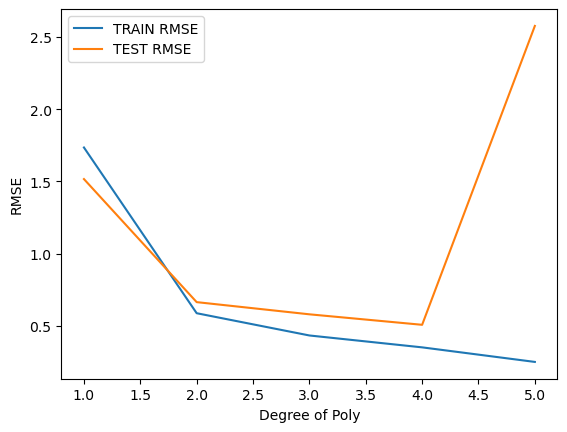

In [42]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

### Model Deployment

In [43]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [44]:
final_model = LinearRegression()

In [46]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [47]:
from joblib import dump, load

In [48]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [49]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [50]:
loaded_converter = load('final_converter.joblib')

In [51]:
loaded_model = load('final_poly_model.joblib')

In [52]:
campaign = [[149, 22, 12]]

In [54]:
transformed_data = loaded_converter.fit_transform(campaign)

In [55]:
loaded_model.predict(transformed_data)

array([14.64501014])

### Feature Scaling

Feature scaling process:
- Perform train test split;
- Fit to TRAINING geature data;
- Transform TRAINING feature data;
- Transform test feature data.

### Regularization Data Setup

In [154]:
df = pd.read_csv('Advertising.csv')

In [155]:
X = df.drop('sales', axis=1)

In [156]:
y = df['sales']

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [63]:
poly_features = polynomial_converter.fit_transform(X)

In [64]:
X.shape

(200, 3)

In [65]:
poly_features.shape

(200, 19)

In [66]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [68]:
X_train.shape

(140, 19)

In [69]:
# Scale the data

from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

##### We don't want any information from the test!

In [71]:
scaler.fit(X_train) # fit only to a training set!

StandardScaler()

In [74]:
# AFTER it fit to the training set - we can create a scaled versions

In [75]:
X_train = scaler.transform(X_train) 
# Some may caled `Scales_X_train` - its easy to track it
# for simplicity we override the original in this example

In [73]:
X_test = scaler.transform(X_test)

In [76]:
X_train[0]

array([-1.79410744, -1.61095574, -1.37744347, -1.18333613, -1.1003036 ,
       -0.95121263, -1.05907808, -0.9010207 , -0.79517677, -0.93391727,
       -0.85411837, -0.72397869, -0.82051004, -0.69107854, -0.58978472,
       -0.84806967, -0.72635358, -0.6159314 , -0.54659284])

In [77]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

## Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge_model = Ridge(alpha=10)

In [93]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [94]:
test_predictions = ridge_model.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
MAE = mean_absolute_error(y_test, test_predictions)

In [96]:
MAE

0.41268949370743413

In [97]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [98]:
RMSE

0.5805273045659757

In [100]:
# Ridge with Cross Validation

In [99]:
from sklearn.linear_model import RidgeCV

In [137]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1, 10), scoring='neg_mean_absolute_error')

In [138]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [139]:
ridge_cv_model.alpha_

10.0

In [104]:
from sklearn.metrics import SCORERS

In [107]:
SCORERS.keys() # for ridge_cv_model, scoring parameters

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [110]:
# normal absolute_mean_error in Ridge - worse, 
# that why we need negative neg_mean_absolute_error - it's better

In [130]:
test_predictions = ridge_cv_model.predict(X_test)

In [131]:
MAE = mean_absolute_error(y_test, test_predictions)

In [132]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [133]:
MAE

0.6395637359629596

In [134]:
RMSE

0.7945192898806624

In [135]:
ridge_cv_model.coef_

array([ 8.51968371e-02,  2.99658968e-02,  1.20416099e-02, -4.07134426e-04,
        1.55118130e-03, -3.34145853e-04, -1.74740478e-03,  8.97282449e-04,
        2.56928975e-04,  6.23927917e-07, -1.81149699e-06,  1.01929254e-06,
        2.60300112e-06, -1.73062745e-06,  1.06101652e-08,  2.18356272e-05,
       -8.51617074e-06, -3.72427451e-06, -1.92111133e-06])

In [136]:
ridge_cv_model.best_score_

-0.36668018428426574

### LASSO - least absolute shrinkage and selection operator

In [140]:
from sklearn.linear_model import LassoCV

In [141]:
# Lasso

In [157]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5)
# eps - the smaller param, the wide range you checking

In [158]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5)

In [166]:
# If in upper cell a convergence warining occurs - need to increase maximum
# iterations in model's parameters `max_iter = 1000000 (for a example)`
# OR you can take bigger `eps`-param (0.1 in this example)

In [159]:
lasso_cv_model.alpha_

23954.310622080102

In [160]:
test_predictions = lasso_cv_model.predict(X_test)

In [161]:
MAE = mean_absolute_error(y_test, test_predictions)

In [162]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [163]:
MAE

1.3018706584630582

In [164]:
RMSE

1.866983482837324

In [165]:
lasso_cv_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.58795042e-08,  3.47802818e-06, -2.10588790e-07,
        1.06879921e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

## Elastic Net

In [167]:
from sklearn.linear_model import ElasticNetCV

In [168]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                             eps=0.001, n_alphas=100)

In [169]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [176]:
elastic_model.l1_ratio_ # in this simple data set - "it's lasso"

1.0

In [171]:
elastic_model.alpha_

23954.310622080102

In [172]:
lasso_cv_model.alpha_

23954.310622080102

In [173]:
test_predictions = elastic_model.predict(X_test)

In [174]:
MAE = mean_absolute_error(y_test, test_predictions)

In [175]:
MAE

1.3018706584630582

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    
    # Set a random seed in the same cell as the random call
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages

In [8]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

<Figure size 1280x960 with 0 Axes>

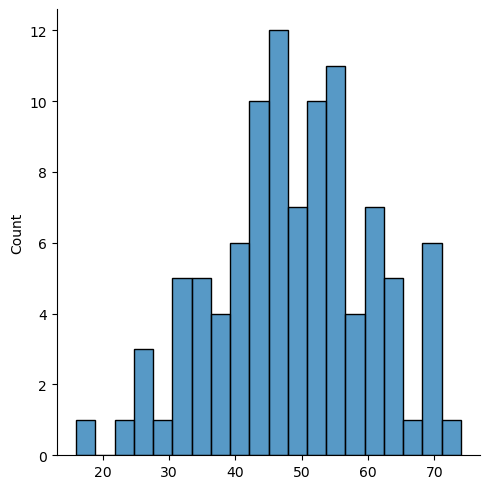

In [9]:
plt.figure(dpi=200)

sns.displot(data=sample, bins=20)

<AxesSubplot:>

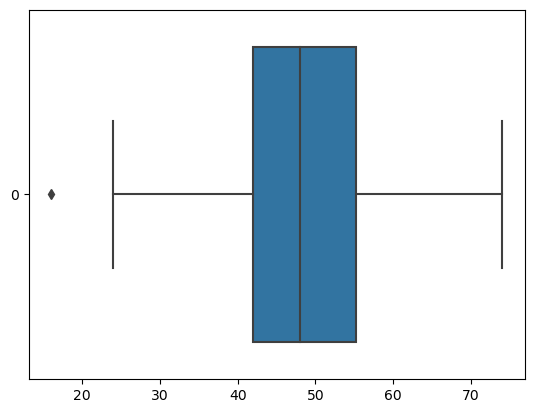

In [11]:
sns.boxplot(data=sample, orient='h')

In [12]:
ser = pd.Series(sample)
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [13]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [16]:
IQR = 55.25 - 42
lower_limit = 42 - 1.5*IQR

In [17]:
lower_limit

22.125

In [18]:
upper_limit = 55.25 + 1.5*IQR

In [19]:
upper_limit

75.125

In [20]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [22]:
np.percentile(sample, [75, 25])

array([55.25, 42.  ])

In [23]:
df = pd.read_csv('../DATA/Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [27]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

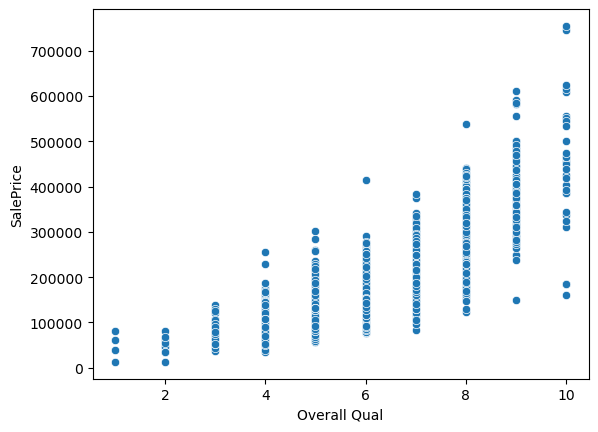

In [31]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

In [35]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

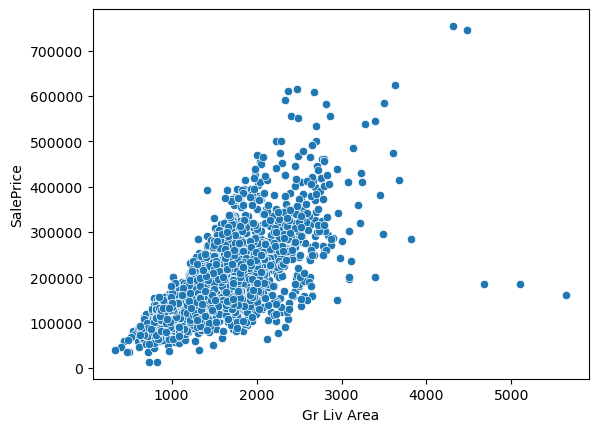

In [32]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [38]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [40]:
drop_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)].index
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [41]:
df = df.drop(drop_ind, axis=0)

In [42]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

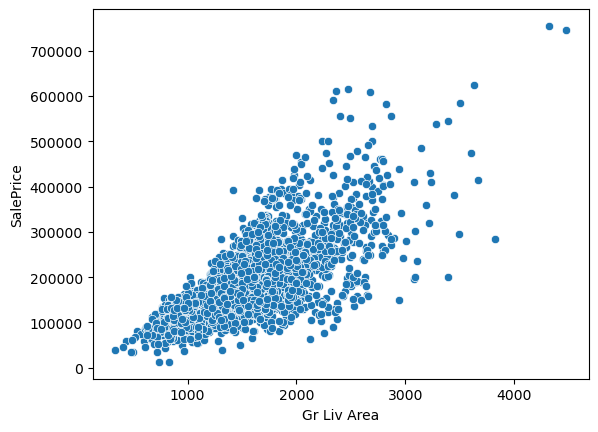

In [43]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [47]:
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [48]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [49]:
df = df.drop('PID', axis=1)

In [50]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [51]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [52]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [55]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [57]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

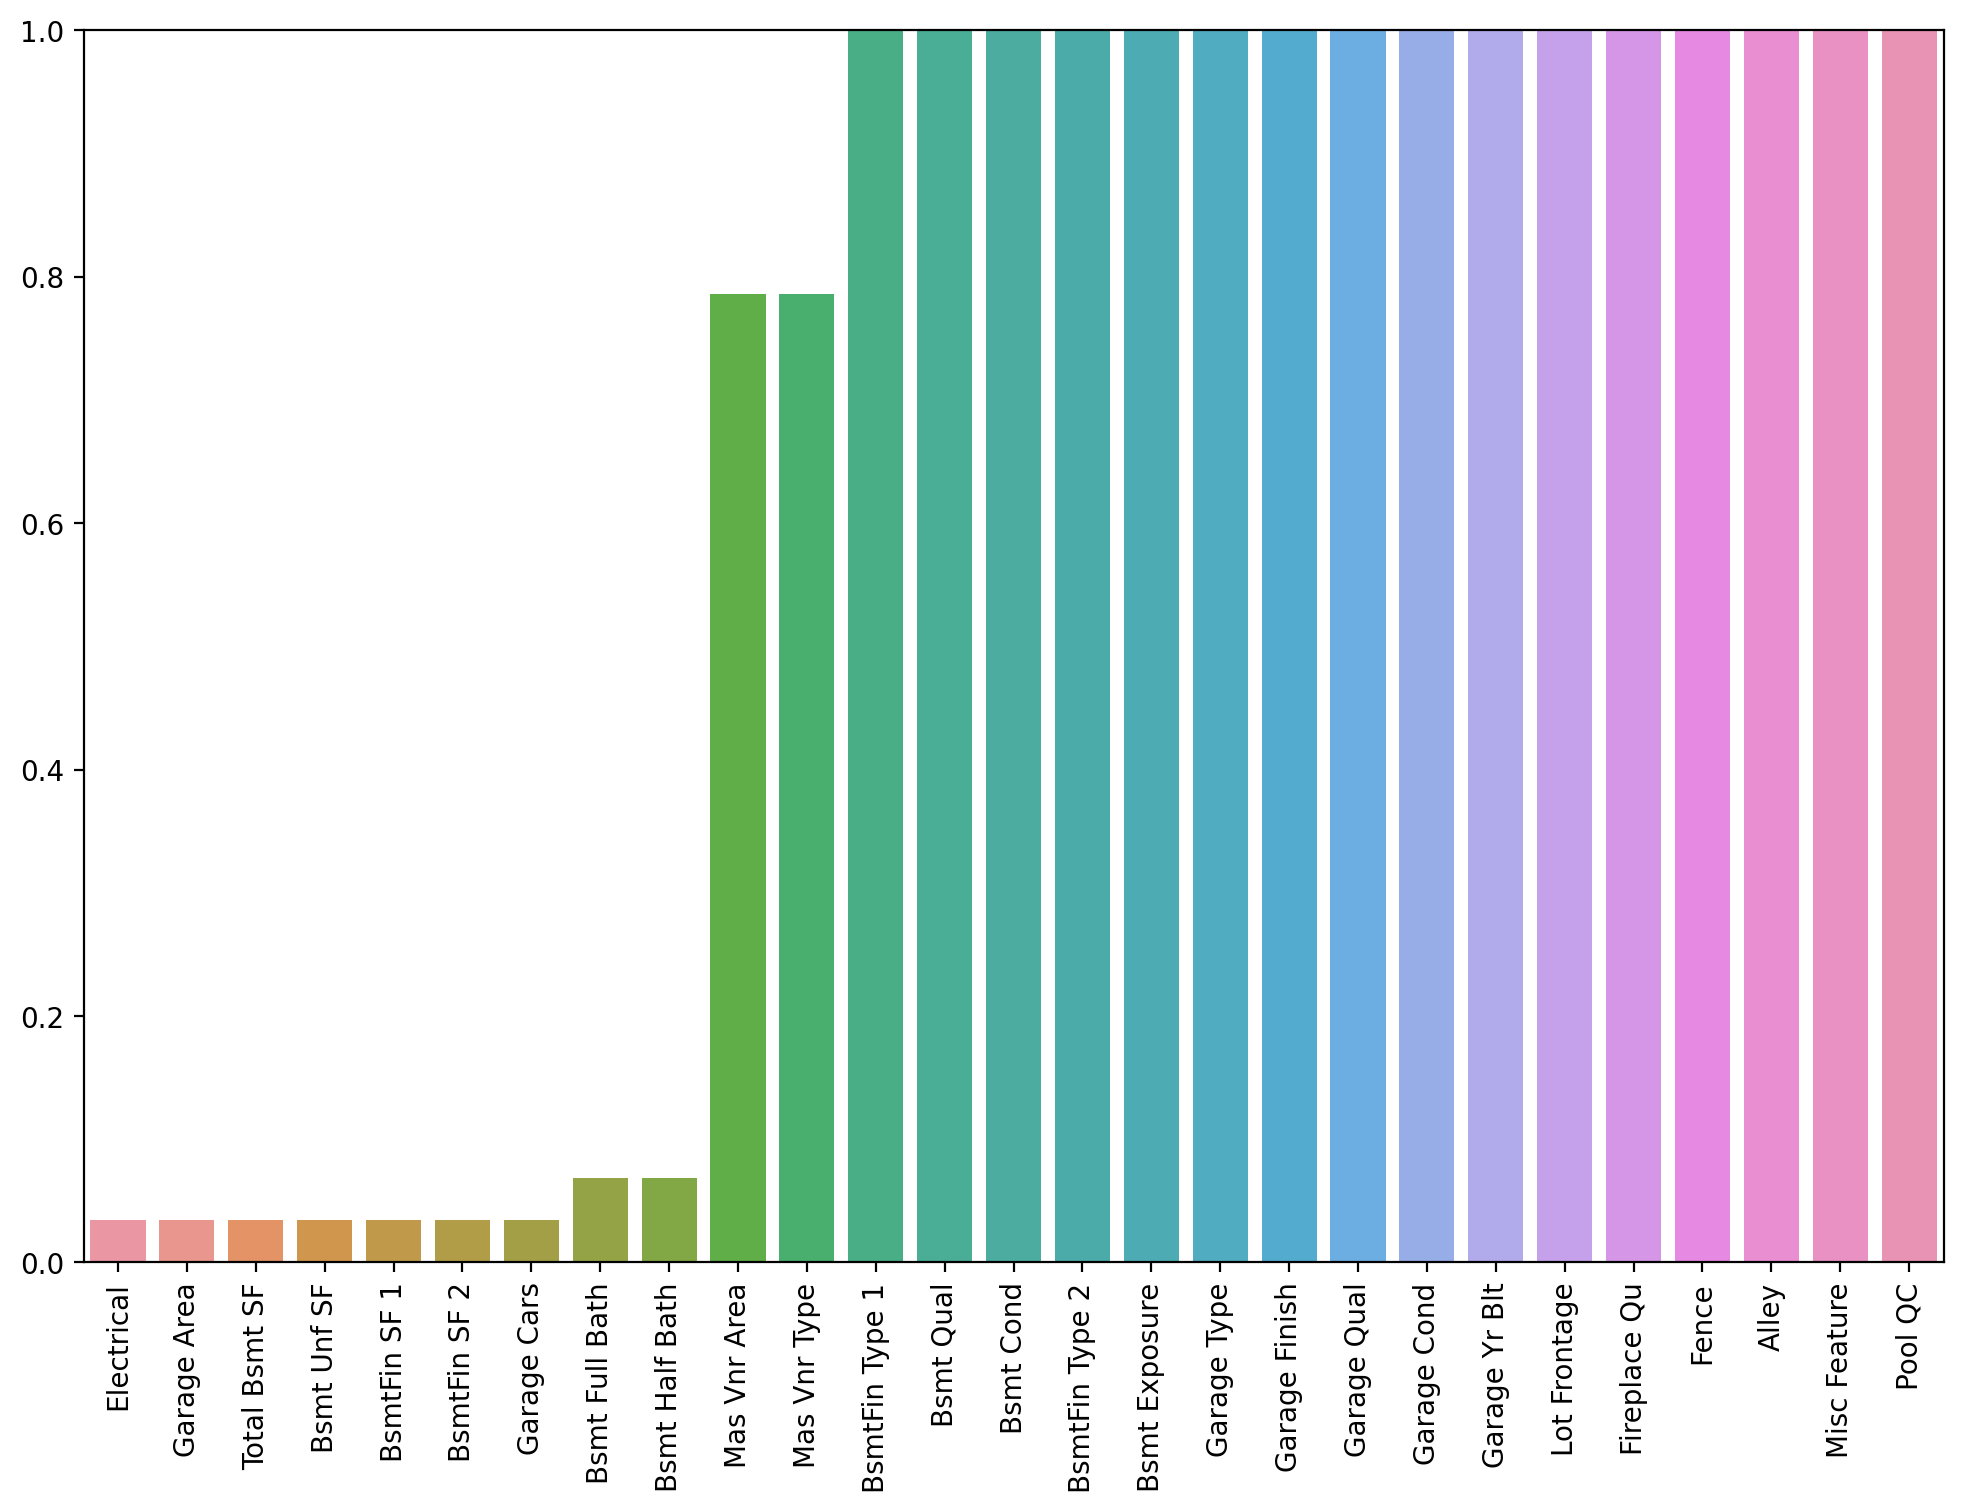

In [64]:
plt.figure(figsize=(12,8), dpi=200)

sns.barplot(x=percent_nan.index, y=percent_nan)

plt.xticks(rotation=90)

plt.ylim(0,1);

In [65]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [67]:
100/len(df)

# i.e. one row has that missing information

0.0341646737273659

In [72]:
df[df['Electrical'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [70]:
df[df['Electrical'].isna()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [73]:
df[df['Bsmt Full Bath'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [75]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

In [78]:
percent_nan = percent_missing(df)
percent_nan

Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Type       0.786325
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Qual        5.401709
Garage Cond        5.401709
Garage Finish      5.401709
Garage Yr Blt      5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

In [79]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [80]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [81]:
# Numerical based columns

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

C:\Users\ztvsp\AppData\Local\Temp\ipykernel_15804\4184624189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


In [82]:
# String based columns

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

C:\Users\ztvsp\AppData\Local\Temp\ipykernel_15804\1758975047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [83]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [84]:
percent_nan = percent_missing(df)

In [85]:
percent_nan[percent_nan < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [86]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\Users\ztvsp\AppData\Local\Temp\ipykernel_15804\3189550505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
C:\Users\ztvsp\AppData\Local\Temp\ipykernel_15804\3189550505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)


In [87]:
percent_nan = percent_missing(df)

In [88]:
percent_nan[percent_nan < 1]

Series([], dtype: float64)

In [101]:
gar_str_col = ['Garage Type', 'Garage Qual', 'Garage Cond', 'Garage Finish']

In [103]:
df[gar_str_col] = df[gar_str_col].fillna('None')

In [105]:
percent_nan = percent_missing(df)
percent_nan

Garage Yr Blt     5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

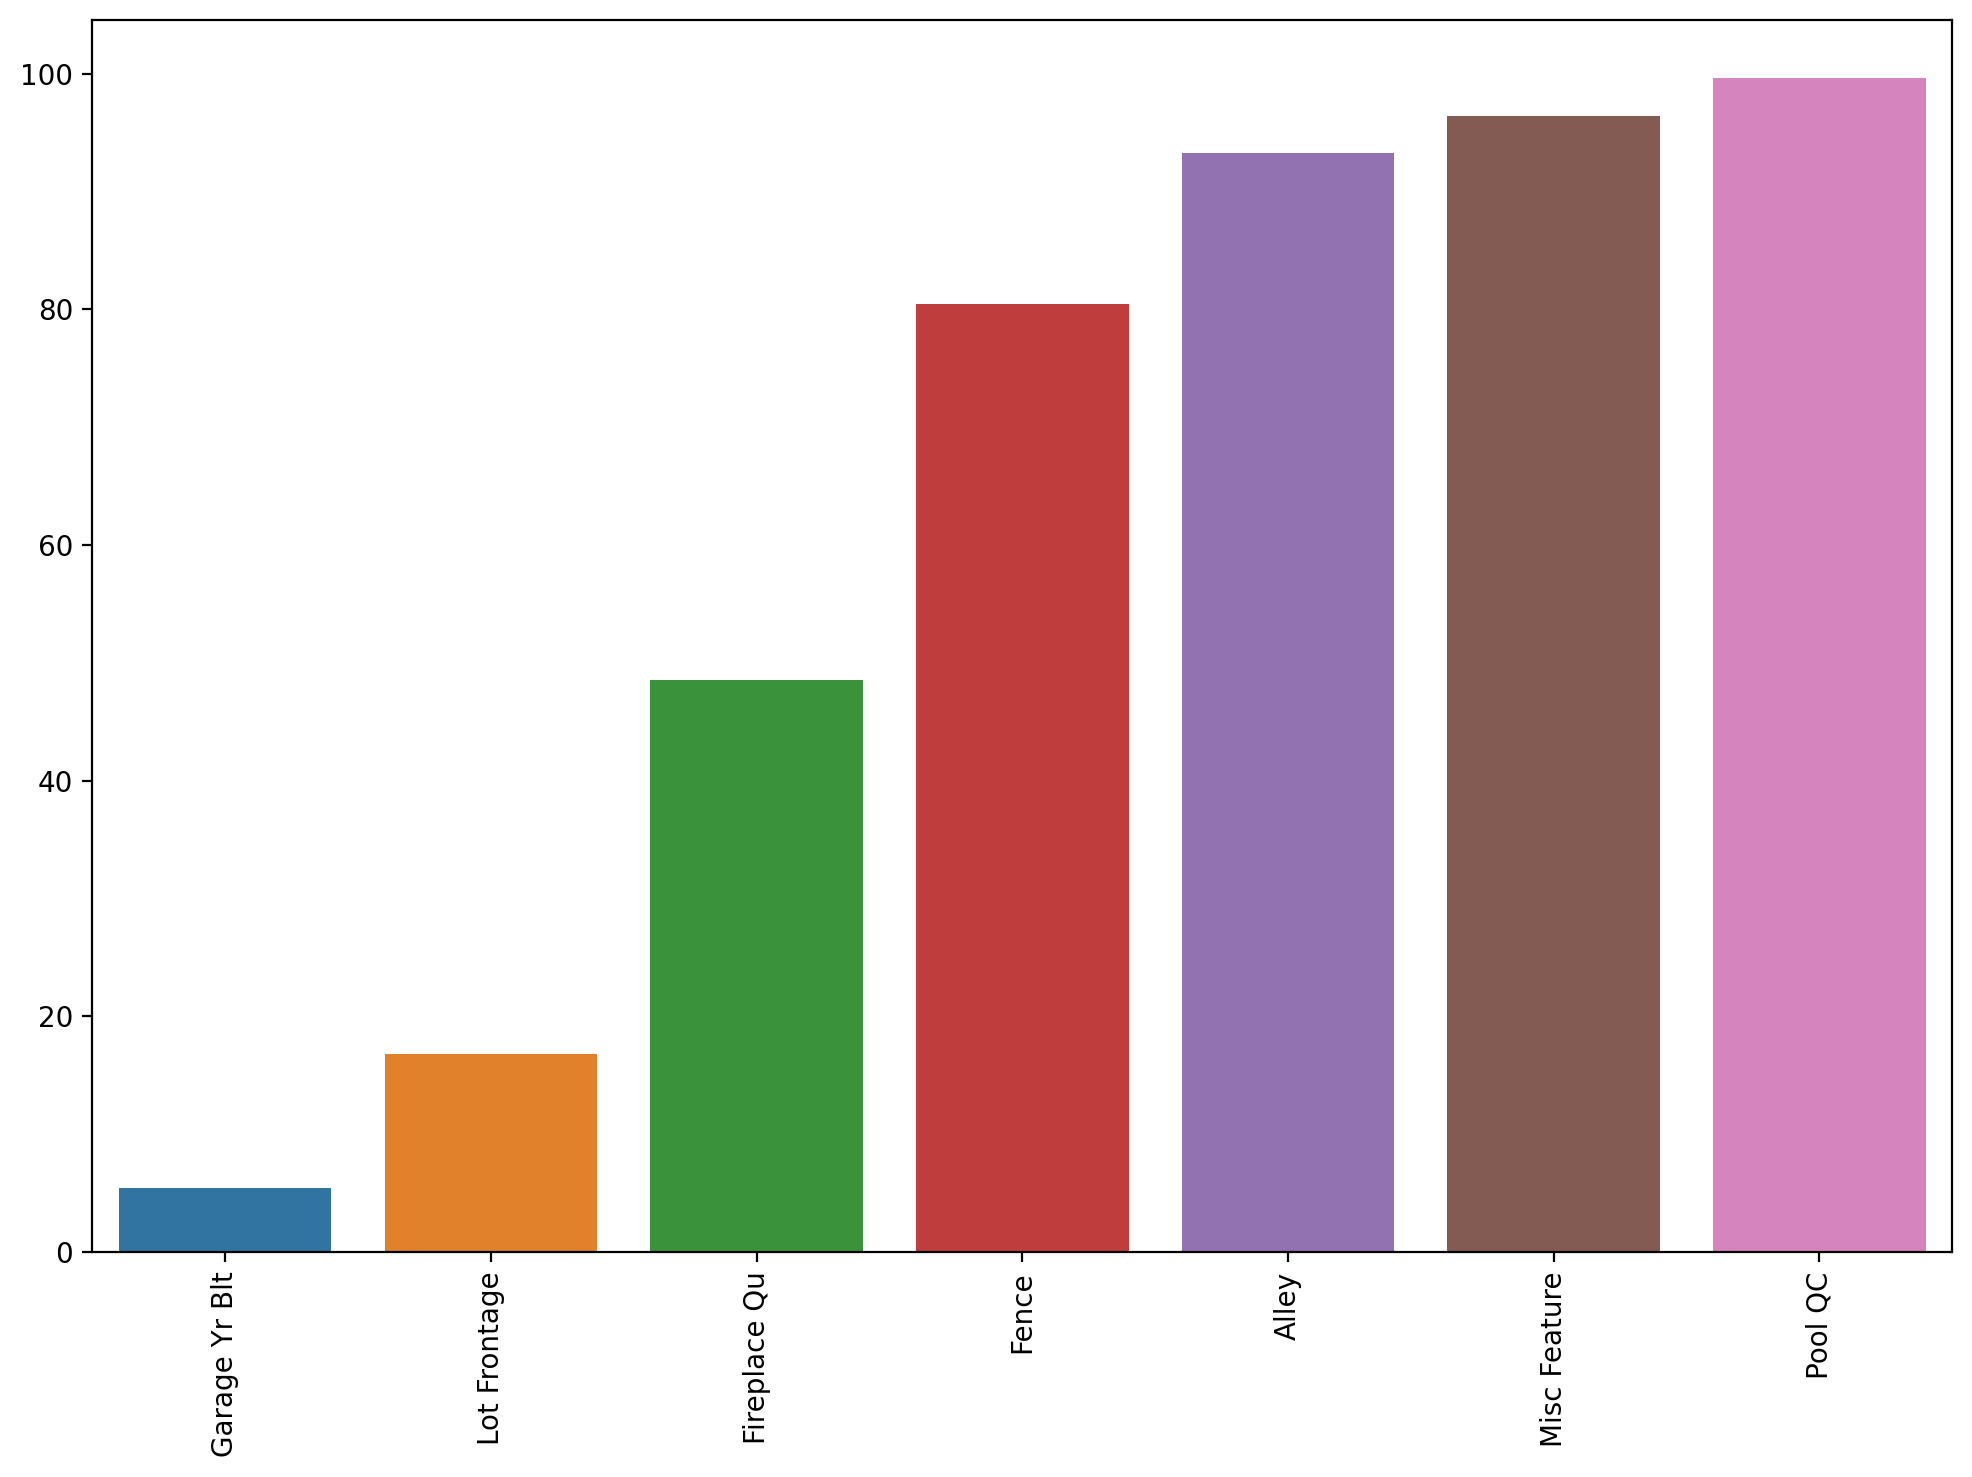

In [106]:
plt.figure(figsize=(12,8), dpi=200)

sns.barplot(x=percent_nan.index, y=percent_nan)

plt.xticks(rotation=90);

In [107]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [108]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

In [110]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

In [111]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

In [114]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [115]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

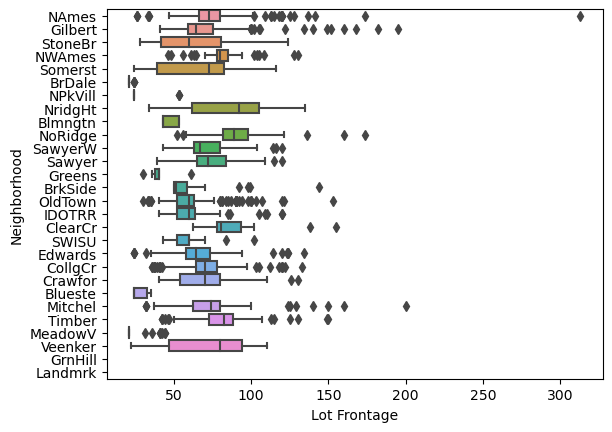

In [117]:
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood')

In [120]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [121]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [122]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [134]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,230000


In [138]:
df.loc[2256]['Neighborhood']

'GrnHill'

In [139]:
df[df['Neighborhood'] == 'GrnHill']

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,330000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,230000


In [140]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [141]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [142]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [144]:
my_objects_df = df.select_dtypes(include='object')
my_objects_df.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [149]:
my_numeric_df = df.select_dtypes(exclude='object')
# my_numeric_df

In [147]:
df_objects_dummies = pd.get_dummies(my_objects_df, drop_first=True)

In [148]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [150]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

In [151]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [154]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

### Cross Validation re-study
Перед продолжением работы над house df.

In [155]:
df_adv = pd.read_csv('../DATA/Advertising.csv')

In [179]:
X = df_adv.drop('sales', axis=1)

In [180]:
y = df_adv['sales']

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()

In [169]:
# To avoid data likeage fit only X_train

In [162]:
scaler.fit(X_train)

StandardScaler()

In [170]:
# Scaler (there is maybe different units in data columns)

In [163]:
X_train = scaler.transform(X_train)

In [164]:
X_test = scaler.transform(X_test)

In [165]:
from sklearn.linear_model import Ridge

In [166]:
model = Ridge(alpha=100)

In [167]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [168]:
y_pred = model.predict(X_test)

In [171]:
from sklearn.metrics import mean_squared_error

In [172]:
mean_squared_error(y_test, y_pred)

7.341775789034128

In [173]:
model_two = Ridge(alpha=1)

In [174]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [177]:
y_pred_two = model_two.predict(X_test)

In [178]:
mean_squared_error(y_test, y_pred_two)

2.3190215794287514

##### Cross Validation - Test | Validation | Train

In [182]:
# Basic parameters are the same as above example

In [183]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

In [184]:
# test_size = 0.5 (50% of 30% other ---> test = 15% of all data)
# Order on the left side равенства matter!
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [185]:
len(df_adv)

200

In [186]:

len(X_train)

140

In [187]:
len(X_eval)

30

In [188]:
len(X_test)

30

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()

In [191]:
scaler.fit(X_train)

StandardScaler()

In [192]:
X_train = scaler.transform(X_train)

In [193]:
X_test = scaler.transform(X_test)

In [194]:
X_eval = scaler.transform(X_eval)

In [195]:
from sklearn.linear_model import Ridge

In [196]:
model_one = Ridge(alpha=100)

In [197]:
model_one.fit(X_train, y_train)

Ridge(alpha=100)

In [198]:
y_eval_pred = model.predict(X_eval)

In [199]:
from sklearn.metrics import mean_squared_error

In [200]:
mean_squared_error(y_eval, y_eval_pred)

7.320101458823869

In [201]:
model_two = Ridge(alpha=1)

In [202]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [203]:
new_pred_eval = model_two.predict(X_eval)

In [204]:
mean_squared_error(y_eval, new_pred_eval)

2.3837830750569853

In [205]:
y_final_test_pred = model_two.predict(X_test)

In [206]:
mean_squared_error(y_test, y_final_test_pred)

2.254260083800517

### Cross Validation - cross_val_score

In [207]:
# Basic parameters are the same as above example

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [209]:
scaler = StandardScaler()

In [210]:
scaler.fit(X_train)

StandardScaler()

In [211]:
X_train = scaler.transform(X_train)

In [212]:
X_test = scaler.transform(X_test)

In [213]:
model = Ridge(alpha=100)

In [214]:
from sklearn.model_selection import cross_val_score

In [216]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [218]:
# Чем выше коэффициенты - тем лучше, так как это 'NEG_mean_squared_error'
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [219]:
abs(scores.mean())

8.215396464543606

In [220]:
model = Ridge(alpha=1)

In [221]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [222]:
abs(scores.mean())

3.3448392965306946

In [223]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [224]:
y_final_test_pred = model.predict(X_test)

In [225]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

### cross_validate

In [228]:
df_adv = pd.read_csv('../DATA/Advertising.csv')

X = df_adv.drop('sales', axis=1)
y = df_adv['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
from sklearn.model_selection import cross_validate

In [230]:
model = Ridge(alpha=100)

In [241]:
scores = cross_validate(model, X_train, y_train, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=10)

In [242]:
scores = pd.DataFrame(scores)

In [239]:
scores.mean()

fit_time                        0.000703
score_time                      0.000400
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [240]:
model = Ridge(alpha=1)

In [243]:
scores.mean()

fit_time                        0.000101
score_time                      0.000899
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [244]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [245]:
y_final_pred = model.predict(X_test)

In [246]:
mean_squared_error(y_test, y_final_pred)

2.3190215794287514

### Grid Search

In [247]:
from sklearn.linear_model import ElasticNet

In [248]:
# help(ElasticNet)

In [249]:
base_elastic_net_model = ElasticNet()

In [250]:
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]}

In [251]:
from sklearn.model_selection import GridSearchCV

In [254]:
grid_model = GridSearchCV(estimator=base_elastic_net_model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1)

In [255]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [256]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [257]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [259]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000998,0.000630,0.000190,0.000380,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,5
1,0.000201,0.000401,0.000396,0.000485,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,4
2,0.000599,0.000489,0.000401,0.000492,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,3
3,0.000802,0.000401,0.000000,0.000000,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
4,0.000600,0.000490,0.000398,0.000487,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
5,0.000200,0.000400,0.000000,0.000000,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,10
6,0.000201,0.000403,0.000000,0.000000,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,9
7,0.000400,0.000490,0.000200,0.000400,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,8
8,0.000602,0.000491,0.000399,0.000488,1,0.99,"{'alpha': 1, 'l1_ratio': 0.99}",-6.521344,-2.431385,-8.471086,-3.946327,-5.151344,-5.304297,2.079945,7
9,0.000803,0.000401,0.000000,0.000000,1,1,"{'alpha': 1, 'l1_ratio': 1}",-6.468807,-2.391483,-8.410171,-3.893566,-5.105922,-5.253990,2.073832,6


In [260]:
y_pred = grid_model.predict(X_test)

In [261]:
from sklearn.metrics import mean_squared_error

In [262]:
mean_squared_error(y_test, y_pred)

2.3873426420874737